<a href="https://colab.research.google.com/github/Rodea41/Machine-Learning-Algorithms/blob/main/Rodea_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Christopher Rodea
#LAB 9 - Logistic Regression 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('/content/Invistico_Airline.csv')

#Drop NA values
#df = df.dropna()

df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [ ]:
#Convert the string values into interger values so they can be trained. 
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['satisfaction'])

#Dropping the column "Gender"
df.drop("satisfaction", axis = 1, inplace=True)

#Adding the new converted column back into the dataset
df["satisfaction"] = label

#Saving the new dataframe into variable df2

df = df.dropna()

data_set= df

data_set

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,3,3,0,3,5,3,2,0,0.0,1
1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,3,4,4,4,2,3,2,310,305.0,1
2,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,3,3,4,4,4,2,0,0.0,1
3,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,1,1,0,1,4,1,3,0,0.0,1
4,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,2,2,0,2,4,2,5,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,3,3,4,4,4,2,0,0.0,1
129876,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,3,2,3,3,1,2,1,174,172.0,0
129877,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,4,4,3,4,2,3,2,155,163.0,0
129878,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,3,3,2,3,2,1,2,193,205.0,0


In [ ]:
#'Flight Distance' (column#5)and 'Departure Delay in Minutes'(column#21) are the two independent variables 
#and 'purchased'(column#4) is the dependent variable
x=data_set.iloc[:,[5,21]].values
y=data_set.iloc[:,22].values

In [ ]:
#splitting the dataset into training and test sets.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25)

In [ ]:

from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
LogisticRegression(C=1.0,class_weight=None, dual=False,fit_intercept=True,
                   intercept_scaling=1,l1_ratio=None, max_iter=100,
                   multi_class='warn',n_jobs=None,penalty=12,
                   random_state=0,solver='warn',tol=0.0001,verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='warn', penalty=12, random_state=0,
                   solver='warn')

In [ ]:
#predicting the test set result
y_pred=classifier.predict(x_test)

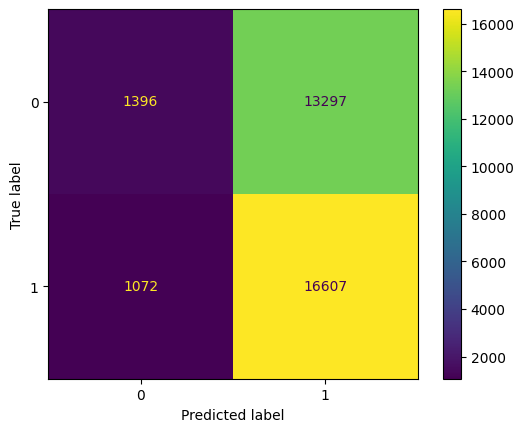

In [ ]:
#Creating the confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Results:

Based on the Confusion Matrix about we can determine the following:

(TPR) True Positive Rate = 16613/(16613+1233) = .9309 or 93.09%
(FPR) False Positive Rate = 13069/(13069+1457) = .8996 or 89.96% 

